# Example of Emergency Alert Control System (EACS)

## How to Use

Select [Run] - [Run All Cells]

## Visualization Hints for JupyterLab

In [101]:
%viz -h

Usage: %viz [--view=<VIEW>] [--style=<STYLE>...] <NAME> [<NAME>...]

Visualize model elements of <NAME>(s). <NAME>s must be fully qualified.

<VIEW> is case insensitive and possible candidates are:
   DEFAULT		Automatically choose an appropriate view from the given model element names
   TREE			Show a tree-structural view, like a Block Definition Diagram (BDD)
   INTERCONNECTION	Show an interconnection view, like an Internal Block Diagram (IBD)
   STATE		Show state machines
   ACTION		Show actions like an activity diagram
   SEQUENCE		Show events and messages in a sequence diagram
   MIXED		Show multiple views

<STYLE> is also case insensitive. Multiple --style options are allowed.  The possible style names are:
  DEFAULT		Standard B&&W
  STDCOLOR		Standard style with colors
  PLANTUML		PlantUML Style
  TB			Top-to-Bottom orientation
  LR			Left-to-Right orientation
  POLYLINE		Polyline style
  ORTHOLINE		Orthogonal line style
  SHOWLIB		Show elements of the standard libraries
  SHOWIN

## Example of Emergency Alert System 

### Source Files

GitHub: https://github.com/yutaro-ito/sample-sysml-v2-project

### Emergency Alert System

#### Stakeholder Definition

GitHub: https://github.com/yutaro-ito/sample-sysml-v2-project/blob/main/src/system-stakeholder.sysml

In [102]:
package 'EACS Stakeholder'
{
    // ====================================
    // Definition of Stakeholders
    // ====================================
    part def 'Customer';
    part def 'Software Engineer';
    part def 'Verification Engineer';

    // ====================================
    // Definition of Stakeholders' Concerns
    // ====================================
    concern 'requirement traceability' {
        doc /* Will the traceable requirements in the system be completely and correctly defined? */
        stakeholder 'Customer';
    }

    concern 'decomposition and allocation' {
        doc /* Will you decompose system to sub-systems and allocate them to HW and SW correctly? */
        stakeholder 'Customer';
        stakeholder 'Software Engineer';
    }

    concern 'requirement and architecture definition' {
        doc /* Will the requirements and architecture in the system be completely and correctly defined? */
        stakeholder 'Customer';
        stakeholder 'Software Engineer';
    }

    concern 'desigbable architecture' {
        doc /* Will you create architecture with which software engineers can define their software requirements and architecture? */
        stakeholder 'Software Engineer';
    }

    concern 'verifiable requirements and architecture' {
        doc /* Will you create requirements and architecture with which verification engineers can define their test scenarios? */
        stakeholder 'Verification Engineer';
    }
}

Package EACS Stakeholder (aa498675-8fb2-4487-86ad-11c738d5c38b)


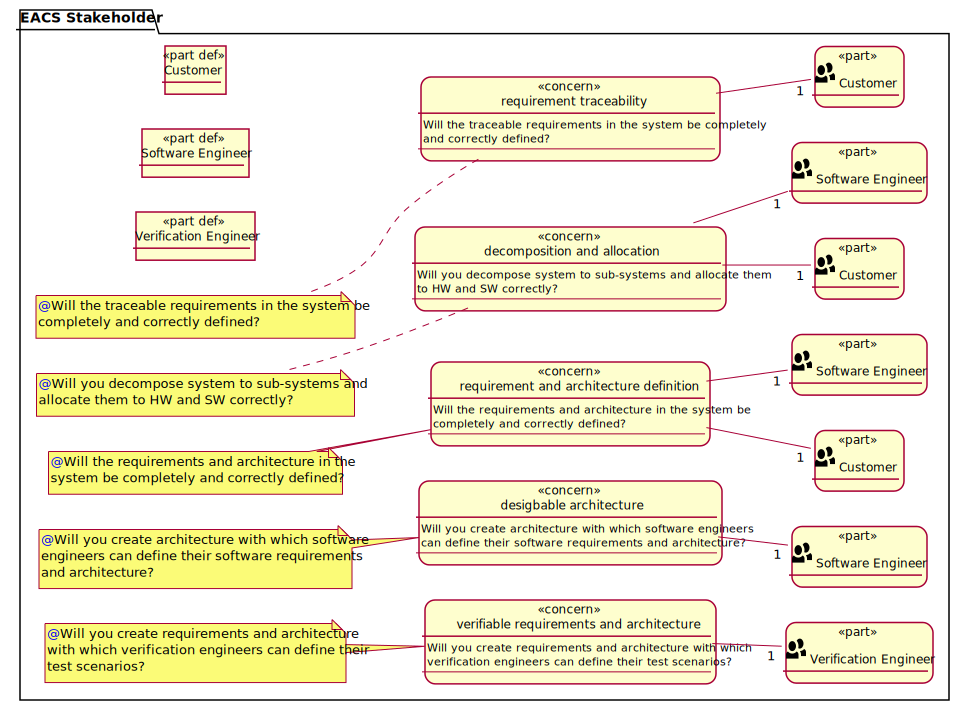

In [103]:
%viz --view tree --style stdcolor --style lr "EACS Stakeholder"

#### Viewpoint and View Definition

GitHub: https://github.com/yutaro-ito/sample-sysml-v2-project/blob/main/src/system-viewpoint-and-view.sysml

In [104]:
package 'EACS Viewpoint and View'
{
    import 'EACS Stakeholder'::*;

    /* ToDo */

    // ====================================
    // Definition of Viewpoints
    // ====================================
    viewpoint 'customer quality viewpoint' {
        frame 'requirement traceability';
        frame 'requirement and architecture definition';
        frame 'decomposition and allocation';
        require constraint {
            doc /* A customer quality viewpoint shall show the hierarchical
                   part decomposition of a system, starting with a
                   specified root part that is linked with requirements.
            */
        }
    }

    viewpoint 'software development viewpoint' {
        frame 'desigbable architecture';
        require constraint {
            doc /* A software development viewpoint shall show the necessary views
                   for software development such as designable architecture.
            */
        }
    }

    viewpoint 'verification viewpoint' {
        frame 'verifiable requirements and architecture';
        require constraint {
            doc /* A verifiaction development viewpoint shall show the necessary views
                   for verification of system requirements and architecture.
            */
        }
    }

    // ====================================
    // Definition of Views (ToDo)
    // ====================================
    view def 'Customer Quality View' {
        satisfy 'customer quality viewpoint';
    }
    view def 'Software Development View' {
        satisfy 'software development viewpoint';
    }
    view def 'Verification View' {
        satisfy 'verification viewpoint';
    }

    // ====================================
    // Usage of Views (ToDo)
    // ====================================
    view 'customer quality view': 'Customer Quality View' {
        /* ToDo */
    }
    view 'software development view': 'Software Development View' {
        /* ToDo */

    }
    view 'verification view': 'Verification View' {
        /* ToDo */
    }
}

Package EACS Viewpoint and View (4cdfd616-d5ad-4387-acf2-ee6946ba8355)


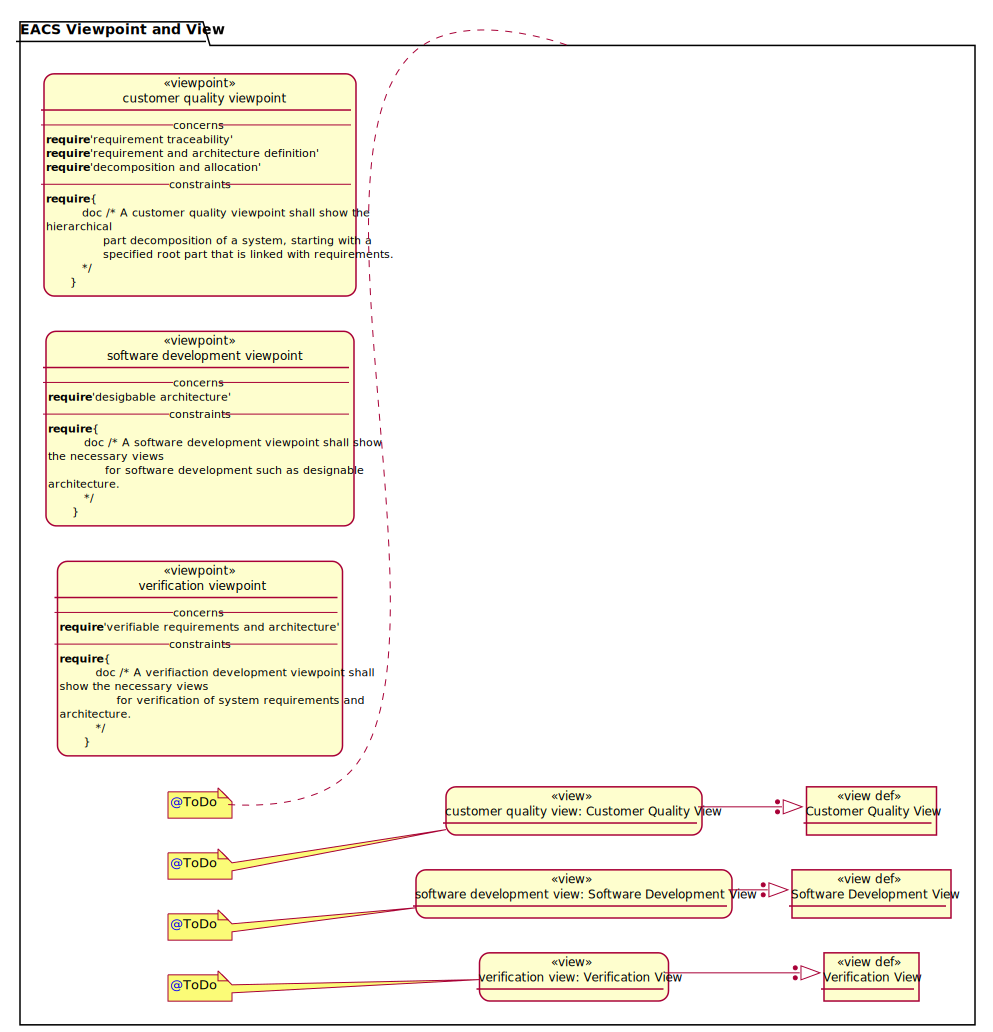

In [105]:
%viz --view tree --style stdcolor --style lr "EACS Viewpoint and View"

#### System Requirement Definition

GitHub: https://github.com/yutaro-ito/sample-sysml-v2-project/blob/main/src/system-requirement.sysml

In [106]:
package 'EACS System Definition'
{
    // ====================================
    // Definition of Systems
    // ====================================
    part def EACS;
    part def External_Environment;
    part def External_System;
}

Package EACS System Definition (21f6c0f3-a1df-4da2-b392-2fca6cc08b56)


In [107]:
package 'EACS System Requirement'
{
    import 'EACS System Definition'::*;

    // ====================================
    // Definition of Attribute
    // ====================================
    attribute def Signal_Output_Period :> ScalarValues::Integer;
    attribute def Acceleration_Sampling_Period :> ScalarValues::Integer;
    attribute def Temperature_Sampling_Period :> ScalarValues::Integer;
    attribute def Acceleration_Low :> ScalarValues::Real;
    attribute def Acceleration_High :> ScalarValues::Real;
    attribute def Temperature_Low :> ScalarValues::Real;
    attribute def Temperature_High :> ScalarValues::Real;

    // ====================================
    // Definition of Requirement
    // ====================================
    requirement def <'REQ_01'> 'Startup Requirement' {
        doc /* After the power ON, the EACS shall initialize its sensors. */
    }
    requirement def <'REQ_02'> 'Initialization Requirement - Signal Output' {
        doc /* During the initialization, the EACS shall send the Alert OFF signal to External System every required period. */
        attribute atr_sig_out_period: Signal_Output_Period;
    }
    requirement def <'REQ_03'> 'Initialization Requirement - Acceleration Sensoring' {
        doc /* During the runtime (i.e. after the initialization), the EACS shall sample the acceleration of the EACS every required period. */
        attribute atr_accel_sample_period: Acceleration_Sampling_Period;
    }
    requirement def <'REQ_04'> 'Initialization Requirement - Temperature Sensoring' {
        doc /* After the initialization, the EACS shall sample the acceleration of the EACS every required period. */
        attribute atr_temp_sample_period: Temperature_Sampling_Period;
    }
    requirement def <'REQ_05'> 'Runtime Requirement - Alert OFF' {
        doc /* During the runtime (i.e. after the initialization), the EACS shall send the Alert OFF signal to External System every required period if the acceleration is between required range and the temperature is between required range. */
        attribute atr_sig_out_period: Signal_Output_Period;
        attribute atr_accel_low: Acceleration_Low;
        attribute atr_accel_high: Acceleration_High;
        attribute atr_temp_low: Temperature_Low;
        attribute atr_temp_high: Temperature_High;
        require constraint { atr_accel_low <= atr_accel_high }
        require constraint { atr_temp_low <= atr_temp_high }
    }
    requirement def <'REQ_06'> 'Runtime Requirement - Alert ON' {
        doc /* During the runtime (i.e. after the initialization), the EACS shall send the Alert ON signal to External System every required period if the acceleration is outside the range and the temperature is between required range. */
        attribute atr_sig_out_period: Signal_Output_Period;
        attribute atr_accel_low: Acceleration_Low;
        attribute atr_accel_high: Acceleration_High;
        attribute atr_temp_low: Temperature_Low;
        attribute atr_temp_high: Temperature_High;
        require constraint { atr_accel_low <= atr_accel_high }
        require constraint { atr_temp_low <= atr_temp_high }
    }
    requirement def <'REQ_07'> 'Runtime Requirement - Temperature Abnormal' {
        doc /* During the runtime (i.e. after the initialization), the EACS shall send the Alert OFF signal to External System every required period if the temperature is outside the range. */
        attribute atr_sig_out_period: Signal_Output_Period;
        attribute atr_temp_low: Temperature_Low;
        attribute atr_temp_high: Temperature_High;
        require constraint { atr_temp_low <= atr_temp_high }
    }
    requirement def <'REQ_08'> 'Shutdown Requirement' {
        doc /* After the power OFF, the EACS shall stop sending the Alert signals to External System. */
    }

    // ====================================
    // Usage of Requirement
    // ====================================
    requirement <'REQ_01.01'> startup_req: 'Startup Requirement' {
        subject eacs: EACS;
    }
    requirement <'REQ_02.01'> init_req_sig_out: 'Initialization Requirement - Signal Output' {
        subject eacs: EACS;
        attribute :>> atr_sig_out_period = 100;
    }
    requirement <'REQ_03.01'> init_req_accel_sample: 'Initialization Requirement - Acceleration Sensoring' {
        subject eacs: EACS;
        attribute :>> atr_accel_sample_period = 100;
    }
    requirement <'REQ_04.01'> init_req_temp_sample: 'Initialization Requirement - Temperature Sensoring' {
        subject eacs: EACS;
        attribute :>> atr_temp_sample_period = 100;
    }
    requirement <'REQ_05.01'> run_req_alert_off: 'Runtime Requirement - Alert OFF' {
        subject eacs: EACS;
        attribute :>> atr_sig_out_period = 100;
        attribute :>> atr_accel_low = -50.0;
        attribute :>> atr_accel_high = 50.0;
        attribute :>> atr_temp_low = -40.0;
        attribute :>> atr_temp_high = 80.0;
    }
    requirement <'REQ_06.01'> run_req_alert_on: 'Runtime Requirement - Alert ON' {
        subject eacs: EACS;
        attribute :>> atr_sig_out_period = 100;
        attribute :>> atr_accel_low = -50.0;
        attribute :>> atr_accel_high = 50.0;
        attribute :>> atr_temp_low = -40.0;
        attribute :>> atr_temp_high = 80.0;
    }
    requirement <'REQ_07.01'> run_req_temp_abnormal: 'Runtime Requirement - Temperature Abnormal' {
        subject eacs: EACS;
        attribute :>> atr_sig_out_period = 100;
        attribute :>> atr_temp_low = -40.0;
        attribute :>> atr_temp_high = 80.0;
    }
    requirement <'REQ_08.01'> shutdown_req: 'Shutdown Requirement' {
        subject eacs: EACS;
    }
}

Package EACS System Requirement (b9b1626a-23ee-43fe-9ba5-a114d6597fdf)


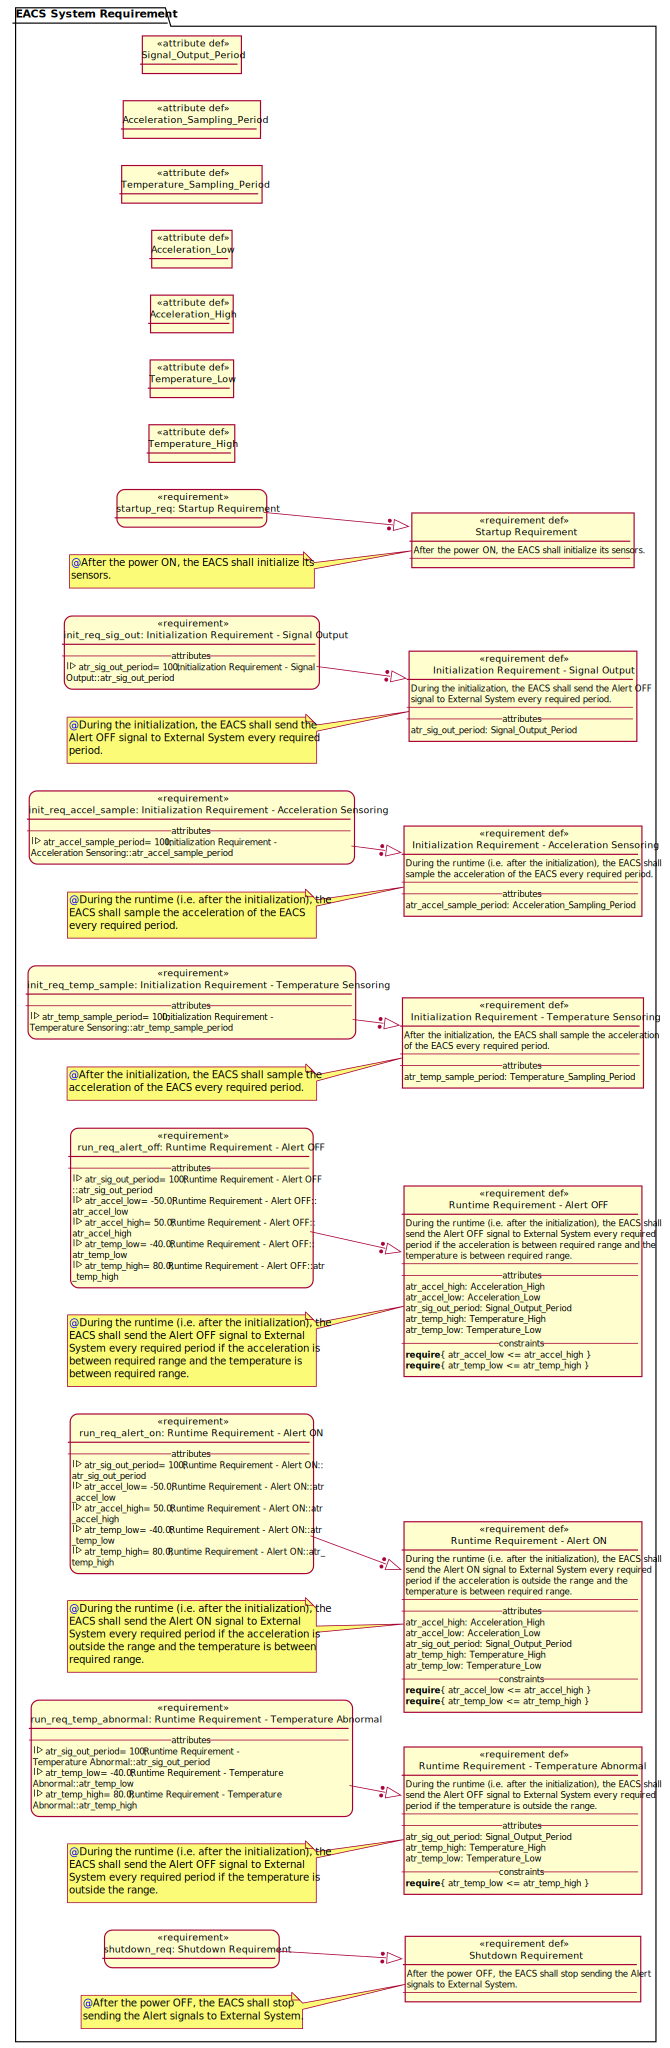

In [108]:
%viz --view tree --style stdcolor --style lr "EACS System Requirement"

#### System Context Definition

GitHub: https://github.com/yutaro-ito/sample-sysml-v2-project/blob/main/src/system-context.sysml

In [109]:
package 'EACS System Context'
{
    import 'EACS System Definition'::*;

    // ====================================
    // Definitions of System Context
    // ====================================
    part def EACS_System_Context {
        part eacs: EACS[1];
        part ext_sys: External_System[1];
        part ext_env: External_Environment[1..*];
    }

    // ====================================
    // Usage of System Context
    // ====================================
    part etac_sys_cxt: EACS_System_Context;
}

Package EACS System Context (1dc921c9-a96d-4bfc-bd03-174cce2936ea)


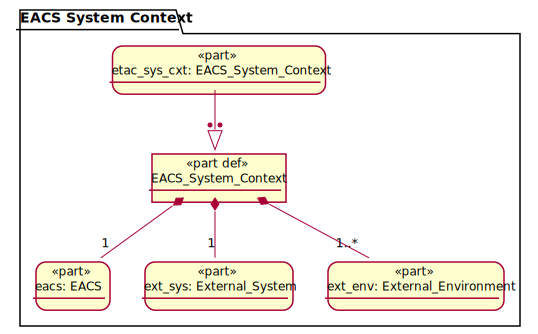

In [110]:
%viz --view tree --style stdcolor --style tb "EACS System Context"

#### System Use Case Definition

GitHub: https://github.com/yutaro-ito/sample-sysml-v2-project/blob/main/src/system-use-case.sysml

In [111]:
package 'EACS System Use Case'
{
    import 'EACS System Context'::*;

    // ====================================
    // Definition of System Use Cases
    // ====================================
    use case def 'Start_System' {
        subject subject_eacs: EACS[1];
        actor actor_ext_sys: External_System[1];
        objective {
            doc /* The External System wants the EACS to start the system to activate the emergency alert function. */
        }
    }
    use case def 'Stop_System' {
        subject subject_eacs: EACS[1];
        actor actor_ext_sys: External_System[1];
        objective {
            doc /* The External System wants the EACS to stop the system to deactivate the emergency alert function. */
        }
    }
    use case def 'Monitor_Acceleration' {
        subject subject_eacs: EACS[1];
        actor actor_ext_env: External_Environment[1..*];
        objective {
            doc /* The External Environment wants the EACS to monitor the acceleration to decide whether emergency alert is issued or not. */
        }
    }
    use case def 'Monitor_Temperature' {
        subject subject_eacs: EACS[1];
        actor actor_ext_env: External_Environment[1..*];
        objective {
            doc /* The External Environment wants the EACS to monitor the temperature to decide whether emergency alert is issued or not. */
        }
    }
    use case def 'Send_Alert_Signal_Periodically' {
        subject subject_eacs: EACS[1];
        actor actor_ext_sys: External_System[1];
        objective {
            doc /* The External System wants the EACS to send alert ON/OFF signals periodically to control emergency alert. */
        }
    }

    // ====================================
    // Usage of System Use Cases
    // ====================================
    use case 'start_system': 'Start_System' {
        subject :>> subject_eacs = etac_sys_cxt.eacs;
        actor :>> actor_ext_sys = etac_sys_cxt.ext_sys;
    }
    use case 'stop_system': 'Stop_System' {
        subject :>> subject_eacs = etac_sys_cxt.eacs;
        actor :>> actor_ext_sys = etac_sys_cxt.ext_sys;
    }
    use case 'monitor_acceleration': 'Monitor_Acceleration' {
        subject :>> subject_eacs = etac_sys_cxt.eacs;
        actor :>> actor_ext_env = etac_sys_cxt.ext_env;
    }
    use case 'monitor_temperature': 'Monitor_Temperature' {
        subject :>> subject_eacs = etac_sys_cxt.eacs;
        actor :>> actor_ext_env = etac_sys_cxt.ext_env;
    }
    use case 'send_alert_signal_periodically': 'Send_Alert_Signal_Periodically' {
        subject :>> subject_eacs = etac_sys_cxt.eacs;
        actor :>> actor_ext_sys = etac_sys_cxt.ext_sys;
    }
}

Package EACS System Use Case (31424143-9e44-44aa-bf77-3261ee1d2b32)


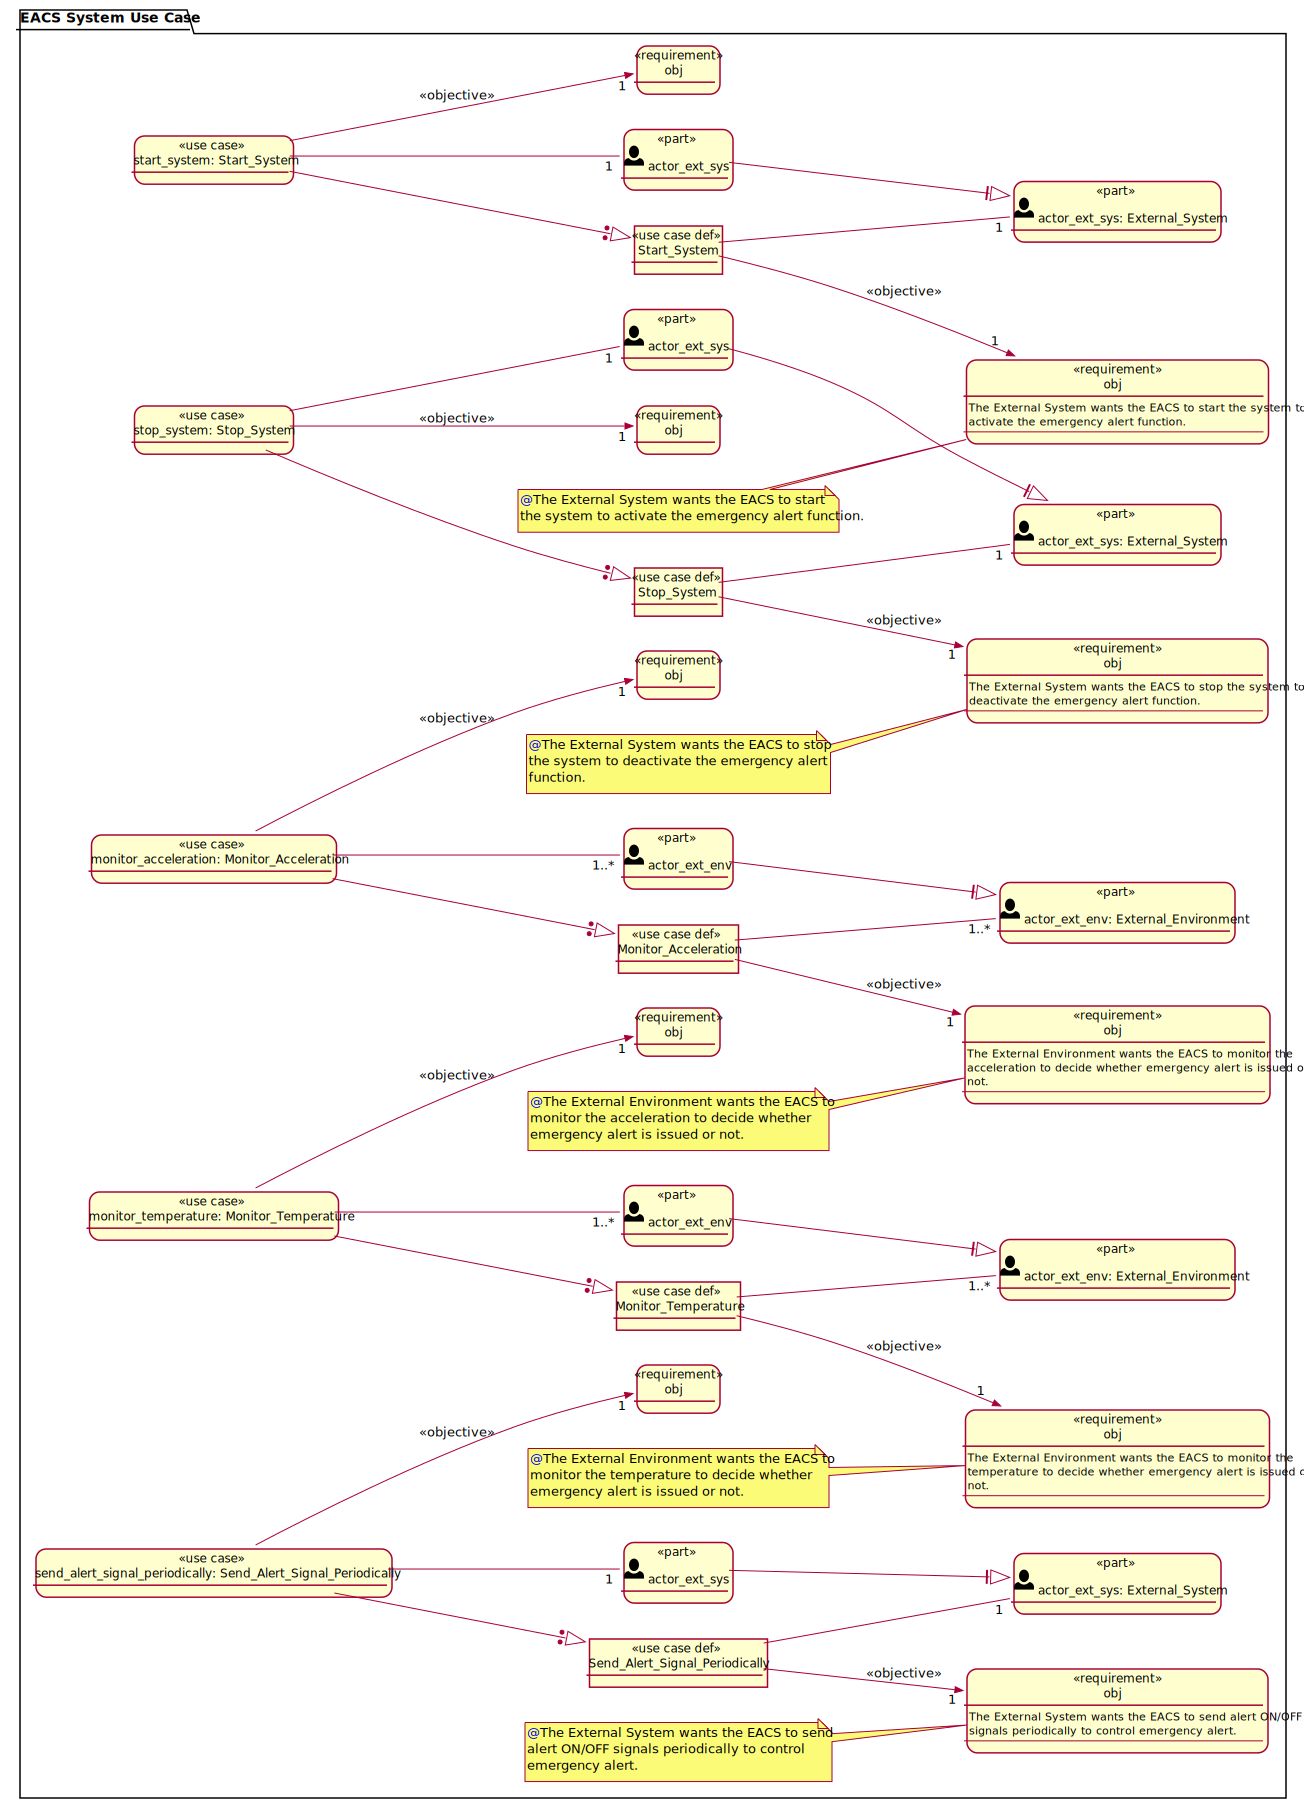

In [112]:
%viz --view tree --style stdcolor --style lr "EACS System Use Case"

#### System Item and Interface Definition

GitHub: https://github.com/yutaro-ito/sample-sysml-v2-project/blob/main/src/system-item.sysml

In [113]:
package 'EACS Item'
{
    // ====================================
    // Definition of Item
    // ====================================
    item def Item_External_Acceleration :> ScalarValues::Integer;
    item def Item_External_Temperature :> ScalarValues::Integer;
    item def Item_Captured_Acceleration :> ScalarValues::Integer;
    item def Item_Captured_Temperature :> ScalarValues::Integer;
    item def Item_Alert_Signal :> ScalarValues::Boolean;
}

Package EACS Item (6b01af60-7a61-470d-9053-99a6ed2258f7)


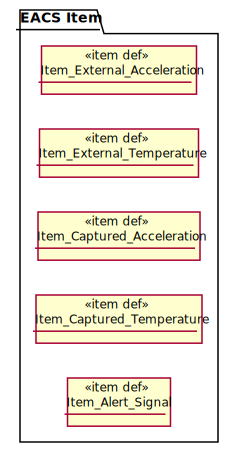

In [114]:
%viz --view tree --style stdcolor --style lr "EACS Item"

#### System Use Case Activity Definition

GitHub: https://github.com/yutaro-ito/sample-sysml-v2-project/blob/main/src/system-use-case-activity.sysml

In [115]:
package 'EACS System Use Case Activity'
{
    import 'EACS Item'::*;
    
    // ====================================
    // Definition of Use Case Activities
    // ====================================
    // Main Action
    action def System_Process { in in_ext_accel: Item_External_Acceleration; in in_ext_temp: Item_External_Temperature; out out_alert_sig: Item_Alert_Signal; }
    action def Start_System { out out_alert_sig: Item_Alert_Signal; }
    action def Monitor_Acceleration { in in_ext_accel: Item_External_Acceleration; out out_accel: Item_Captured_Acceleration; }
    action def Monitor_Temperature { in in_ext_temp: Item_External_Temperature; out out_temp: Item_Captured_Temperature; }
    action def Send_Alert_Signal_Periodically { in in_accel: Item_Captured_Acceleration; in in_temp: Item_Captured_Temperature; out out_alert_sig: Item_Alert_Signal; }
    action def Stop_System {}

    // Sub Action
    action def Initialize_Acceleration_Sensor {}
    action def Initialize_Temperature_Sensor {}
    action def Capture_Acceleration { in in_ext_accel: Item_External_Acceleration; out out_accel: Item_Captured_Acceleration; }
    action def Capture_Temperature { in in_ext_temp: Item_External_Temperature; out out_temp: Item_Captured_Temperature; }
    action def Send_Alert_Signal_ON { out out_alert_sig_on: Item_Alert_Signal; }
    action def Send_Alert_Signal_OFF { out out_alert_sig_off: Item_Alert_Signal; }
    action def Send_Alert_Signal_Initial { out out_alert_sig_off: Item_Alert_Signal; }
    action def Stop_Sending_Alert_Signal{}

    // ====================================
    // Usage of Use Case Activities
    // ====================================
    action system_process: System_Process {
        in item in_ext_accel: Item_External_Acceleration;
        in item in_ext_temp: Item_External_Temperature;
        out item out_alert_sig: Item_Alert_Signal;

        first start;
        then action start_system: Start_System {
            out item out_alert_sig: Item_Alert_Signal;

            first start;
            then fork;
                then initialize_acceleration_sensor;
                then initialization_temperature_sensor;
                then send_alert_signal_init;
            
            action initialize_acceleration_sensor: Initialize_Acceleration_Sensor;
            then joinNode;
            
            action initialization_temperature_sensor: Initialize_Temperature_Sensor;
            then joinNode;

            action send_alert_signal_init: Send_Alert_Signal_Initial {
                out item out_alert_sig_off = start_system::out_alert_sig;
            }
            then joinNode;

            join joinNode;
            then done;
        }
        then fork;
            then monitor_acceleration;
            then monitor_temperature;
            then send_alert_signal_periodically;
        
        action monitor_acceleration: Monitor_Acceleration {
            in item in_ext_accel = system_process::in_ext_accel;
            out item out_accel;
            
            first start;
            then merge continueMonitoring;
            then action capture_acceleration: Capture_Acceleration {
                in item in_ext_accel = monitor_acceleration::in_ext_accel;
                out item out_accel = monitor_acceleration::out_accel;
            }
            then continueMonitoring;
        }
        then joinNode;
        action monitor_temperature: Monitor_Temperature {
            in item in_ext_temp = system_process::in_ext_temp;
            out item out_temp;
            
            first start;
            then merge continueMonitoring;
            then action capture_temperature: Capture_Temperature {
                in item in_ext_temp = monitor_temperature::in_ext_temp;
                out item out_temp = monitor_temperature::out_temp;
            }
            then continueMonitoring;
        }
        then joinNode;
        action send_alert_signal_periodically: Send_Alert_Signal_Periodically {
            in item in_accel = monitor_acceleration.out_accel;
            in item in_temp = monitor_temperature.out_temp;
            out item out_alert_sig: Item_Alert_Signal;

            first start;
            then merge continueSending;
            then decide;
                // @ToDo temporary solution
                if in_temp < -40 then send_alert_signal_off;
                if in_temp > 80 then send_alert_signal_off;
                if in_accel < -50 then send_alert_signal_on;
                if in_accel > 50 then send_alert_signal_on;
                if in_accel >= -50 then send_alert_signal_off;
                if in_accel <= 50 then send_alert_signal_off;
// @ToDo
//                if ((in_temp < -40) || (in_temp > 80)) then send_alert_signal_off;
//                if (((in_accel >= -50) && (in_accel <= 50)) && ((in_temp >= -40) && (in_temp <= 80))) then send_alert_signal_off;
//                if (((in_accel < -50) || (in_accel > 50)) && ((in_temp >= -40) && (in_temp <= 80))) then send_alert_signal_on;
                    
            action send_alert_signal_on: Send_Alert_Signal_ON {
                out item out_alert_sig_on = send_alert_signal_periodically::out_alert_sig;
            }
            then continueSending;
                    
            action send_alert_signal_off: Send_Alert_Signal_OFF {
                out item out_alert_sig_off = send_alert_signal_periodically::out_alert_sig;
            }
            then continueSending;
        }
        then joinNode;

        join joinNode;
        then action stop_system: Stop_System {
            first start;
            then action stop_sending_alert_signal: Stop_Sending_Alert_Signal;
            then done;
        }
        then done;
    }
}


Package EACS System Use Case Activity (812dd591-9f7a-4bb6-b3b5-f899d276606f)


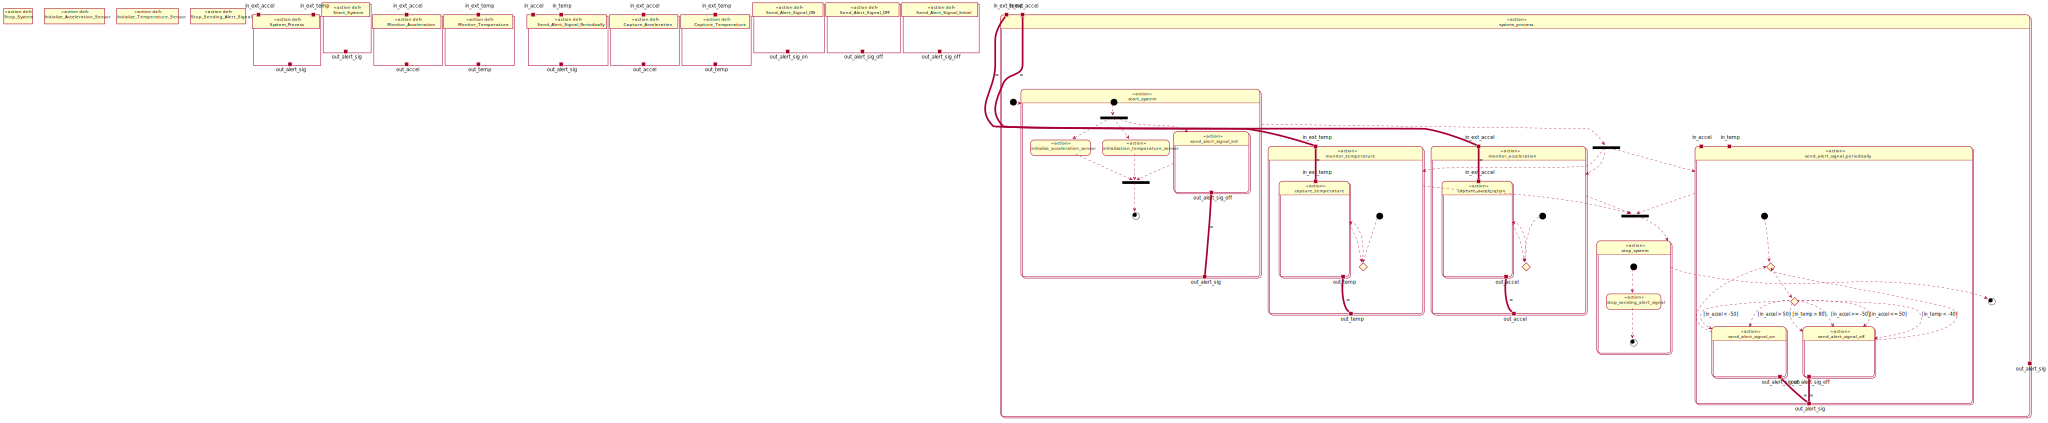

In [116]:
%viz --view action --style stdcolor --style tb "EACS System Use Case Activity"

#### System Logical Architecture Definition

GitHub: https://github.com/yutaro-ito/sample-sysml-v2-project/blob/main/src/system-logical-architecture-stm.sysml

In [117]:
package 'EACS Logical Architecture'
{
    import 'EACS System Context'::*;
    import 'EACS Item'::*;
    import 'EACS System Use Case Activity'::*;

    // ====================================
    // Definitions of System Logical Architecture
    // ====================================
    part def EACS_Logical_Architcture :> EACS;
    part eacs_logical_architcture: EACS_Logical_Architcture {
        // Part with Actions
        perform action perf_system_process :> system_process;
        part accel_sensor: Acceleration_Sensor[1] {
            // Action
            perform perf_system_process.start_system.initialize_acceleration_sensor;
            perform perf_system_process.monitor_acceleration.capture_acceleration;
            // Event
            event occurrence sensedAccelSent;
        }
        part temp_sensor: Temperature_Sensor[1] {
            // Action
            perform perf_system_process.start_system.initialization_temperature_sensor;
            perform perf_system_process.monitor_temperature.capture_temperature;
            // Event
            event occurrence sensedTempSent;            
        }
        part controller: Controller[1] {
            // Action
            perform perf_system_process.start_system.send_alert_signal_init;
            perform perf_system_process.send_alert_signal_periodically.send_alert_signal_off;
            perform perf_system_process.send_alert_signal_periodically.send_alert_signal_on;
            perform perf_system_process.stop_system.stop_sending_alert_signal;
            // Event
            event occurrence sensedAccelReceived;
            then event occurrence sensedTempReceived;            
        }

        // Port (External Interfaces)
        port p_ext_in_ext_accel: ~Port_External_Acceleration;
        port p_ext_in_ext_temp: ~Port_External_Temperature;
        port p_ext_out_alert_sig: Port_Alert_Signal;

        // Internal Interface Connection
        interface: IF_Captured_Acceleration connect
            end_out_cap_accel ::> accel_sensor.p_cap_accel to
            end_in_cap_accel ::> controller.p_cap_accel;
        interface: IF_Captured_Temperature connect
            end_out_cap_temp ::> temp_sensor.p_cap_temp to
            end_in_cap_temp ::> controller.p_cap_temp;
    }

    // ====================================
    // Definitions of Parts in System
    // ====================================
    part def Acceleration_Sensor {
        port p_ext_accel: ~Port_External_Acceleration = eacs_logical_architcture.p_ext_in_ext_accel;
        port p_cap_accel: Port_Captured_Acceleration;
    }
    part def Temperature_Sensor {
        port p_ext_temp: ~Port_External_Temperature = eacs_logical_architcture.p_ext_in_ext_temp;
        port p_cap_temp: Port_Captured_Temperature;
    }
    part def Controller {
        port p_cap_accel: ~Port_Captured_Acceleration;
        port p_cap_temp: ~Port_Captured_Temperature;
        port p_alert_sig: Port_Alert_Signal = eacs_logical_architcture.p_ext_out_alert_sig;
    }

    // ====================================
    // Definition of Port
    // ====================================
    port def Port_External_Acceleration {
        out item item_ext_accel: Item_External_Acceleration;
    }
    port def Port_External_Temperature {
        out item item_ext_temp: Item_External_Temperature;
    }
    port def Port_Captured_Acceleration {
        out item item_cap_accel: Item_Captured_Acceleration;
    }
    port def Port_Captured_Temperature {
        out item item_cap_temp: Item_Captured_Temperature;
    }
    port def Port_Alert_Signal {
        out item item_alert_sig: Item_Alert_Signal;
    }

    // ====================================
    // Definitions of Interfaces
    // ====================================
    interface def IF_Captured_Acceleration {
        end end_out_cap_accel: Port_Captured_Acceleration;
        end end_in_cap_accel: ~Port_Captured_Acceleration;
    }
    interface def IF_Captured_Temperature {
        end end_out_cap_temp: Port_Captured_Temperature;
        end end_in_cap_temp: ~Port_Captured_Temperature;
    }
}

Package EACS Logical Architecture (99820755-e121-4c5d-a87e-4d3c4834aa3a)


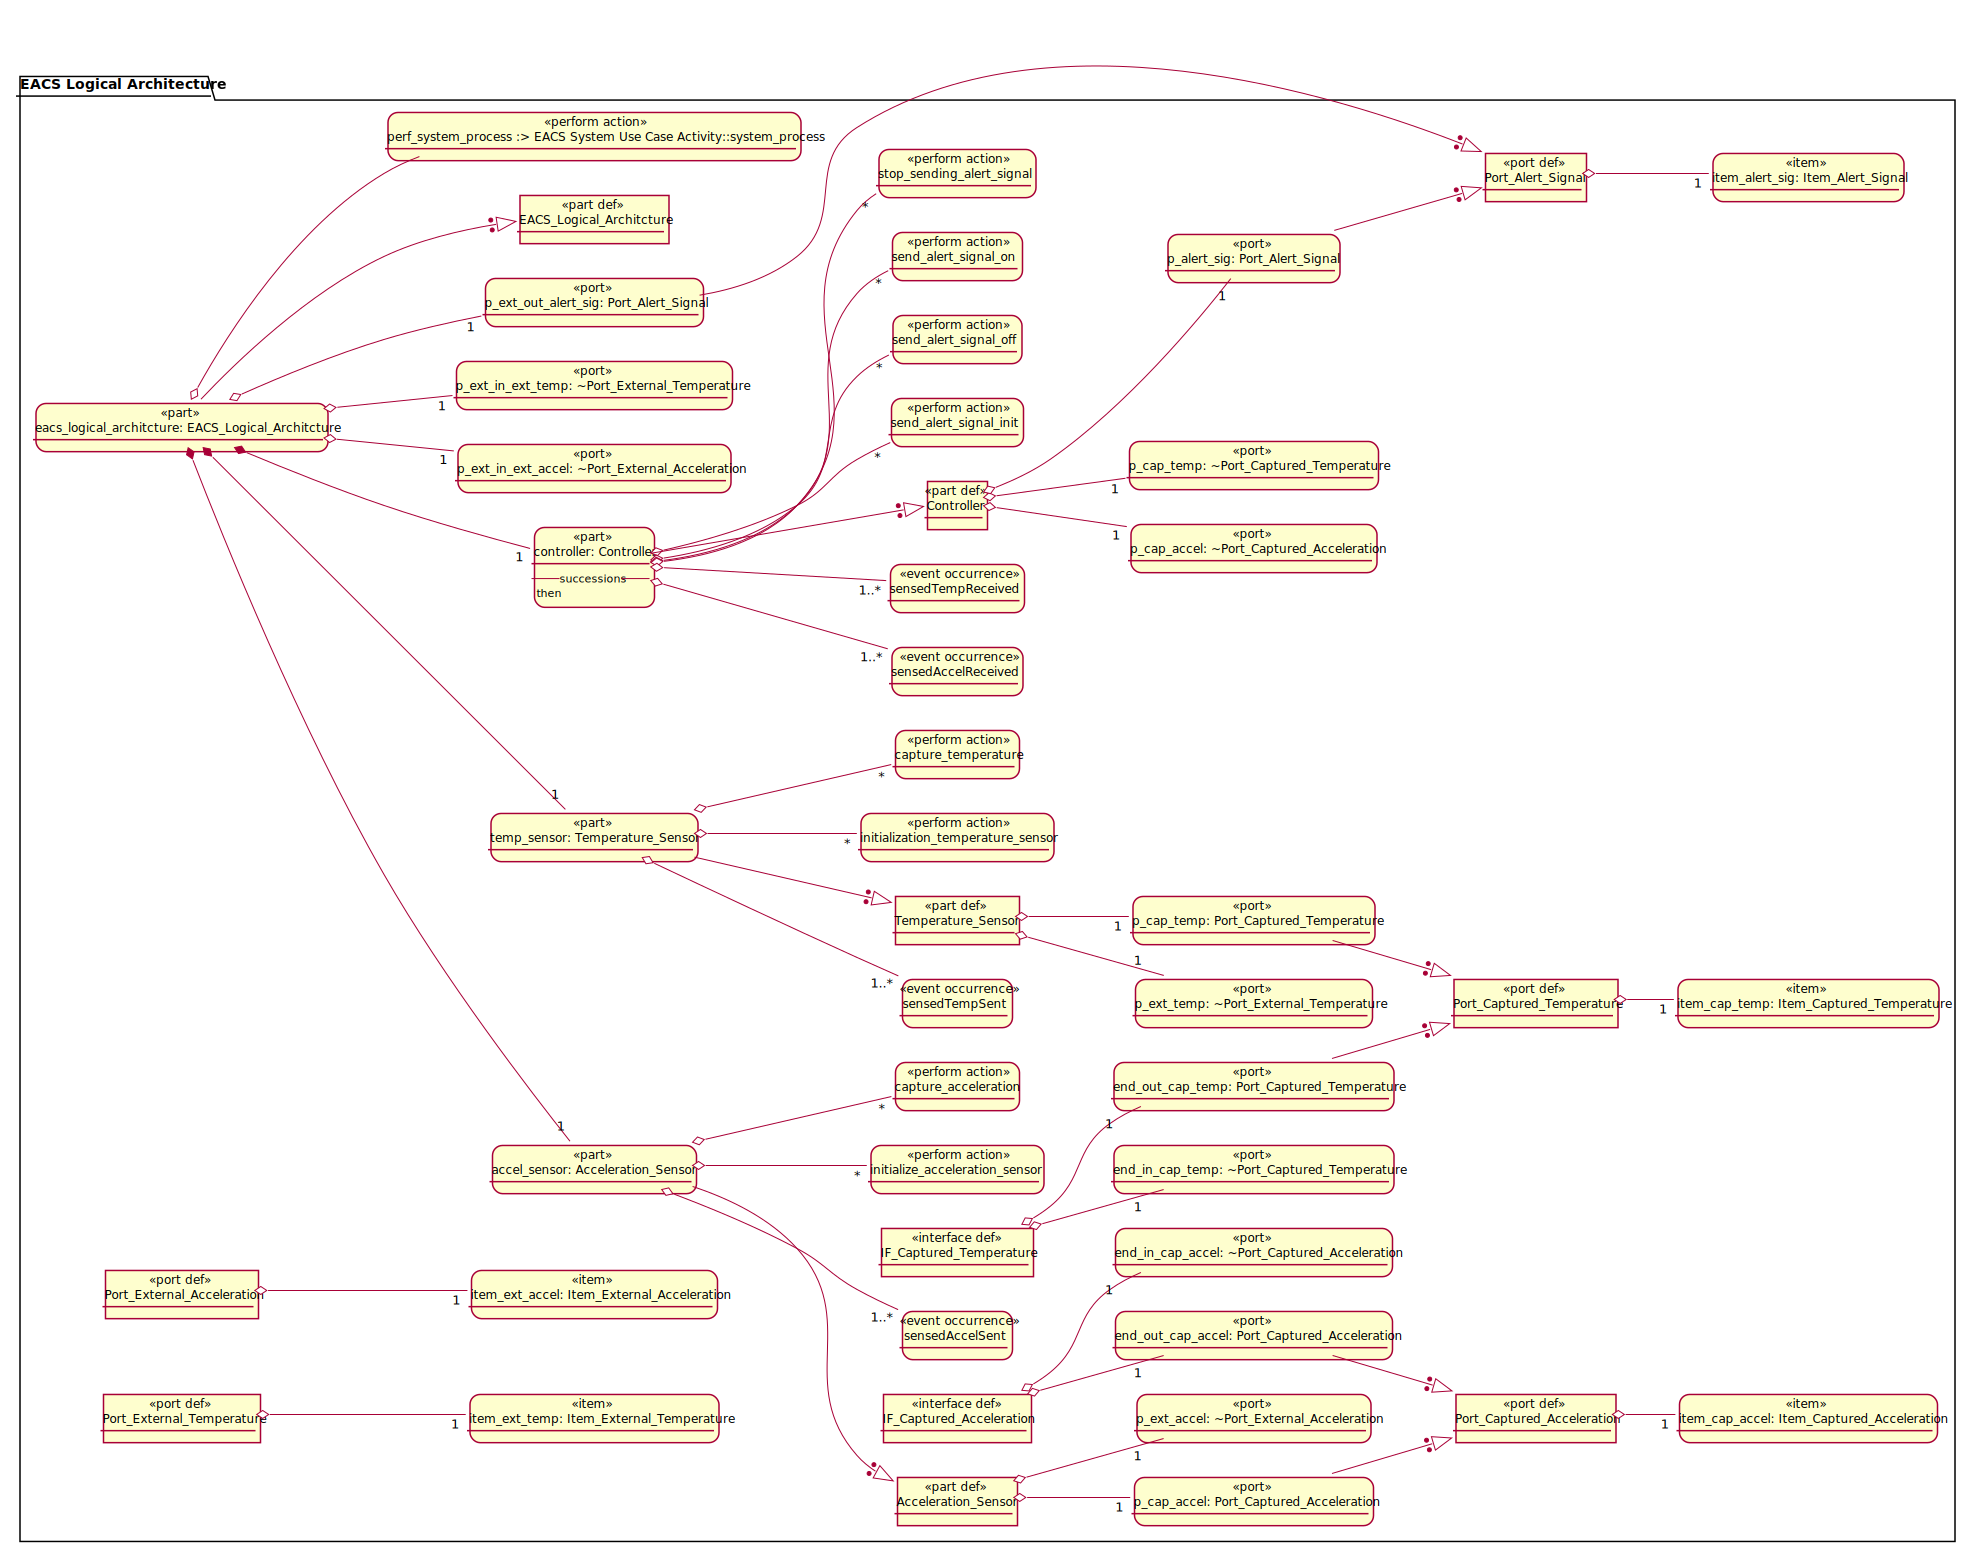

In [118]:
%viz --view tree --style stdcolor --style lr "EACS Logical Architecture"

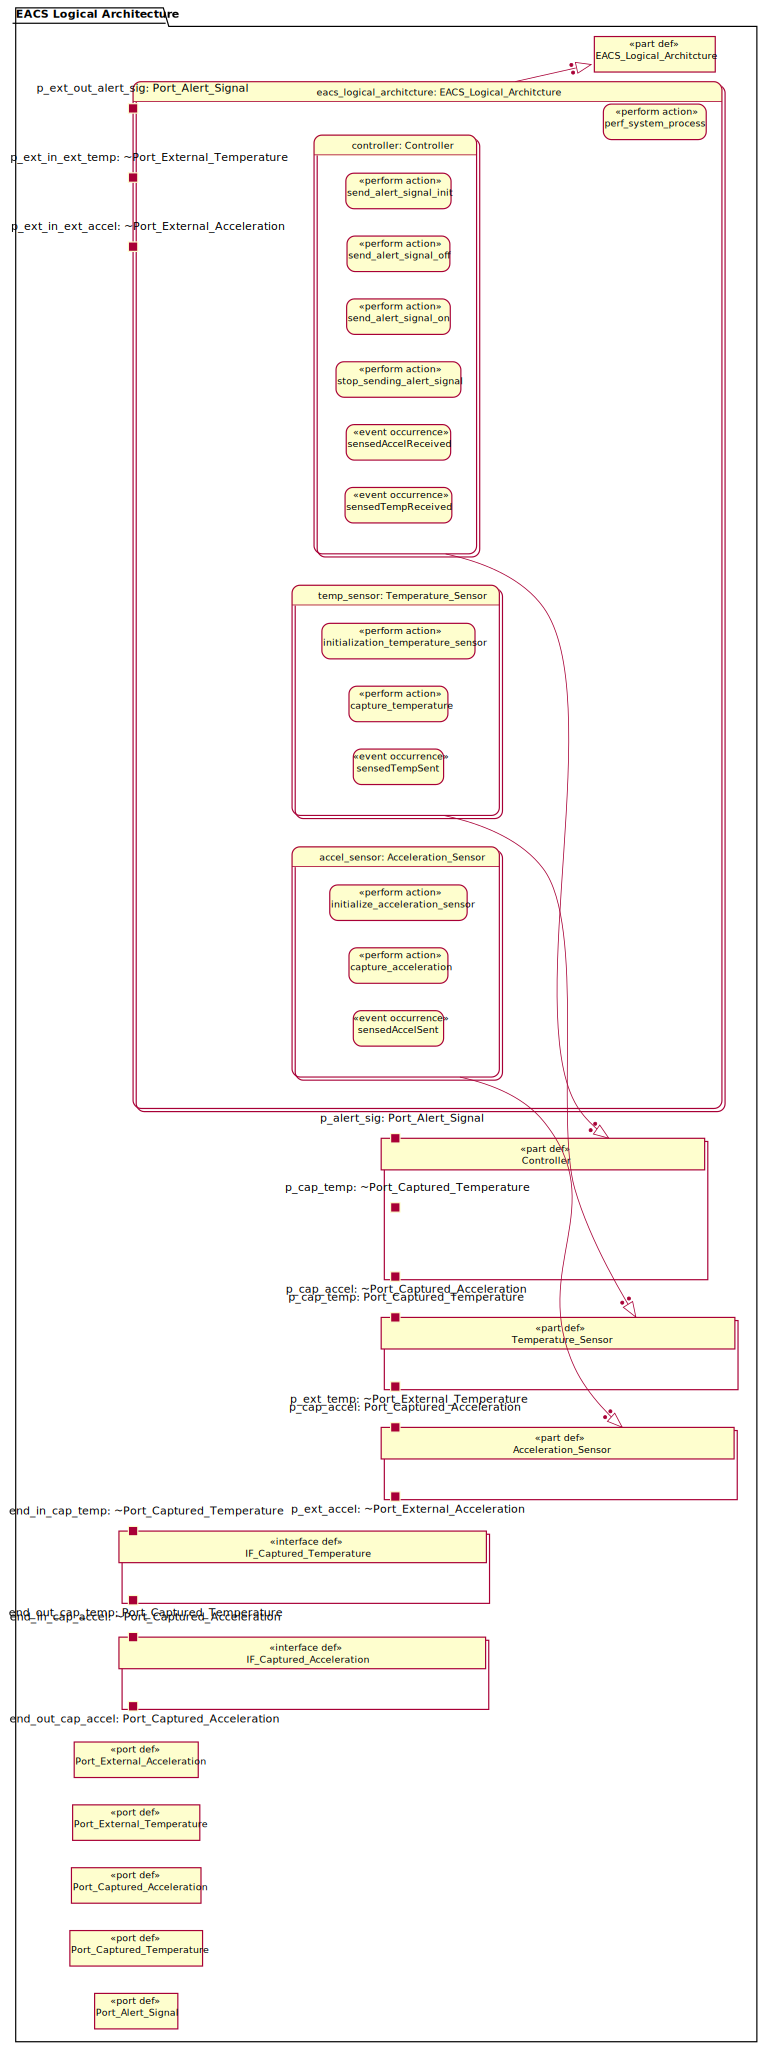

In [119]:
%viz --view interconnection --style stdcolor --style lr "EACS Logical Architecture"

#### System State Machine Definition

GitHub: https://github.com/yutaro-ito/sample-sysml-v2-project/blob/main/src/system-logical-architecture-stm.sysml

In [120]:
package 'EACS Logical Architecture State Machine'
{
    state def EACS_State_Machine;

    attribute def TRG_Power_ON;
    attribute def TRG_Power_OFF;
    attribute def TRG_Initialization_Completed;

    state eace_state_machine: EACS_State_Machine {
        // Entry
        entry; then Power_OFF_State;
        // State
        state Power_OFF_State;
        accept TRG_Power_ON then Power_ON_State;

        state Power_ON_State {
            // Entry
            entry; then Initialization_State;
            // State
            state Initialization_State;
            accept TRG_Initialization_Completed then Runtime_State;
            state Runtime_State;
        }
        accept TRG_Power_OFF then Power_OFF_State;
    }
}

Package EACS Logical Architecture State Machine (2cbc3538-d97b-46e6-b040-097663f0f77b)


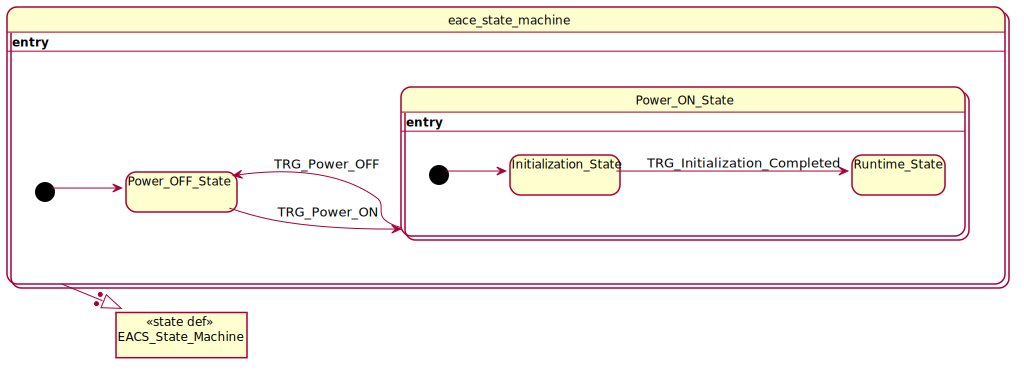

In [121]:
%viz --view state --style stdcolor --style lr "EACS Logical Architecture State Machine"

#### System Scenario Definition

GitHub: https://github.com/yutaro-ito/sample-sysml-v2-project/blob/main/src/system-logical-architecture-sd.sysml

In [122]:
package 'EACS Logical Architecture Sequence'
{
    import 'EACS Logical Architecture'::*;
    
    occurrence def EACS_Sequence {
    message sensedAccelMessage
        from eacs_logical_architcture.accel_sensor.sensedAccelSent
        to eacs_logical_architcture.controller.sensedAccelReceived;

    message sensedTempMessage
        from eacs_logical_architcture.temp_sensor.sensedTempSent
        to eacs_logical_architcture.controller.sensedTempReceived;
    }
}

Package EACS Logical Architecture Sequence (bdfcbc31-fa30-402a-97f5-35ef841132ea)


In [123]:
%viz --view sequence "EACS Logical Architecture Sequence"

#### System Variant

In [124]:
package 'EACS System Variant'
{
    import 'EACS System Context'::*;
    import 'EACS Item'::*;
    import 'EACS Logical Architecture'::*;

    // ====================================
    // Definitions of Variant Parts in System
    // ====================================
    part low_end_accel_sensor: Acceleration_Sensor[1];
    part high_end_accel_sensor: Acceleration_Sensor[1];
    part low_end_temp_sensor: Temperature_Sensor[1];
    part high_end_temp_sensor: Temperature_Sensor[1];
    part low_end_controller: Controller[1];
    part high_end_controller: Controller[1];

    // ====================================
    // Variability Model
    // ====================================
    variation part def Acceleration_Sensor_Choices :> Acceleration_Sensor {
        variant low_end_accel_sensor;
        variant high_end_accel_sensor;
    }
    variation part def Temperature_Sensor_Choices :> Temperature_Sensor {
        variant low_end_temp_sensor;
        variant high_end_temp_sensor;
    }
    variation part def Controller_Sensor_Choices :> Controller {
        variant low_end_controller;
        variant high_end_controller;
    }

    // ====================================
    // Variant Configuration
    // ====================================
    part var_accel_sensor: Acceleration_Sensor_Choices[1];
    part var_temp_sensor: Temperature_Sensor_Choices[1];
    part var_controller: Controller_Sensor_Choices[1];

    abstract part EACS_Family: EACS {
        part accel_sensor: Acceleration_Sensor_Choices;
        part temp_sensor: Temperature_Sensor_Choices;
        part controller: Controller_Sensor_Choices;
    }

    // Patern #1 Super Low End
    part EACS_Super_Low_End :> EACS_Family {
        part redefines accel_sensor = var_accel_sensor::low_end_accel_sensor;
        part redefines temp_sensor = var_temp_sensor::low_end_temp_sensor;
        part redefines controller = var_controller::low_end_controller;
    }

    // Patern #2 Intelligent Controller
    part EACS_Intelligent_COntroller :> EACS_Family {
        part redefines accel_sensor = var_accel_sensor::low_end_accel_sensor;
        part redefines temp_sensor = var_temp_sensor::low_end_temp_sensor;
        part redefines controller = var_controller::high_end_controller;
    }

    // Patern #3 Super High End
    part EACS_Super_High_End :> EACS_Family {
        part redefines accel_sensor = var_accel_sensor::high_end_accel_sensor;
        part redefines temp_sensor = var_temp_sensor::high_end_temp_sensor;
        part redefines controller = var_controller::high_end_controller;
    }
}

Package EACS System Variant (163a772c-643a-4116-abbf-1131da6c9f98)


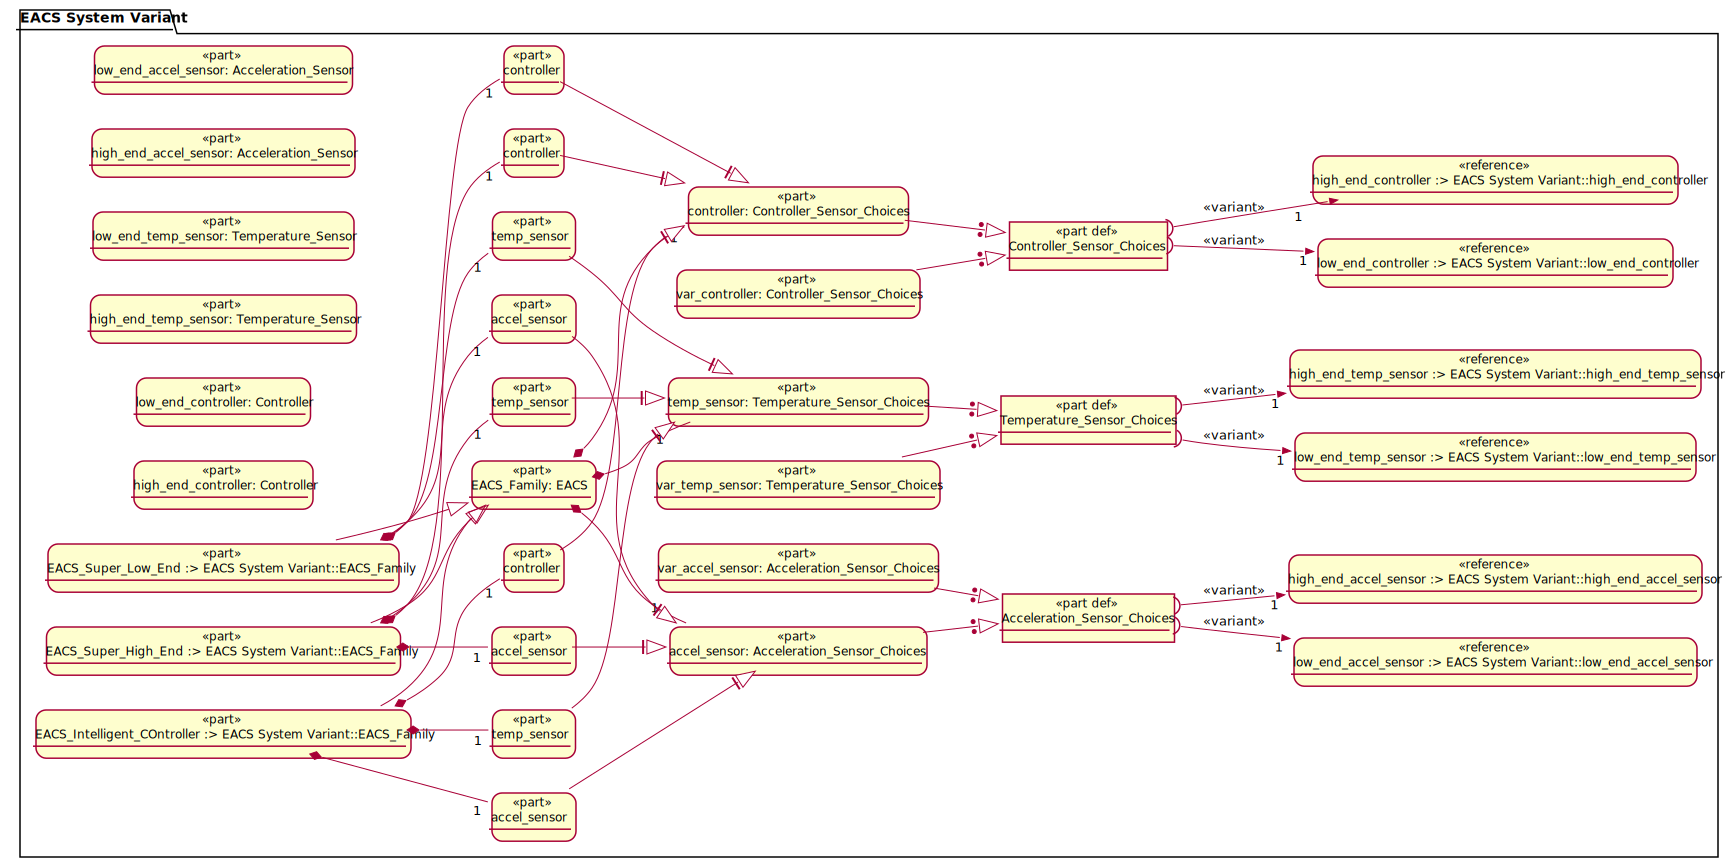

In [125]:
%viz --view tree --style stdcolor --style lr "EACS System Variant"